### Show performance across different sets

In [1]:
import pandas as pd

df_perf_Chronic = pd.read_csv('../proc/performance/Test_Chronic_performance.csv')
df_perf_RA = pd.read_csv('../proc/performance/Test_RA_performance.csv')
df_perf_FMS = pd.read_csv('../proc/performance/Test_FMS_performance.csv')
df_perf_OA = pd.read_csv('../proc/performance/Test_OA_performance.csv')
df_perf = pd.concat([df_perf_Chronic, df_perf_RA])
df_perf = pd.concat([df_perf, df_perf_FMS])
df_perf = pd.concat([df_perf, df_perf_OA])
df_perf = df_perf[df_perf['N']>50].copy()
df_perf = df_perf.rename(columns= {'PR-AUC': 'AUC-PRC', 'ROC-AUC' : 'AUC-ROC'} )
df_perf = df_perf.sort_values(by='Task', ascending=False)

In [2]:
df_perf[['Center', 'Task', 'N', 'cases']]

,Center,Task,N,cases
1,Zierikzee,RA,186,17
2,Vlissingen,RA,352,39
3,Terneuzen,RA,167,21
4,Zeist,RA,74,3
9,Roosendaal,RA,866,68
10,Goes,RA,359,31
10,Goes,OA,359,89
9,Roosendaal,OA,866,170
4,Zeist,OA,74,15
3,Terneuzen,OA,167,46


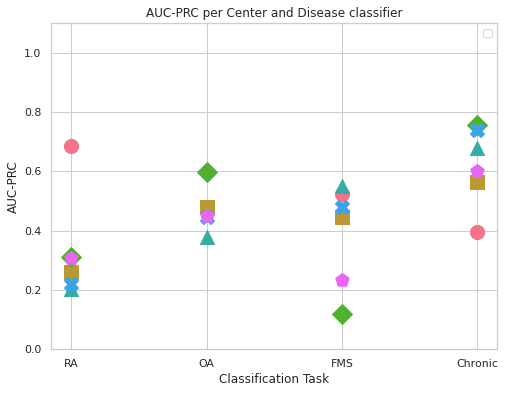

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

l_selection = []
# Set the style
sns.set(style="whitegrid")

# Create a color palette and markers
palette = sns.color_palette("husl", len(df_perf['Center'].unique()))
markers = ['o', 's', 'D', '^', 'X', 'p', 'H', '<', '*', 'P']

# Initialize the plot
plt.figure(figsize=(8, 6))

metric = 'AUC-PRC' #'CO_acc'
 #'ROC-AUC'

# Plot each center with different markers and colors
for idx, center in enumerate(df_perf.sort_values(by='N')['Center'].unique()):
    center_data = df_perf[df_perf['Center'] == center].dropna(subset=[metric])
    plt.scatter(center_data['Task'], center_data[metric],
                label=center, color=palette[idx], marker=markers[idx], s=200)
    
# Add titles and labels
plt.title('%s per Center and Disease classifier' % metric)
plt.xlabel('Classification Task')
plt.ylabel('%s' % metric)
plt.legend([])#, title='Center')
plt.ylim(0, 1.1)

# Show plot
plt.show()

### Show performance in validation set based on subgroups

In [4]:
import pandas as pd

df_sub_Chronic = pd.read_csv('../proc/performance/Test_Chronic_Subgroups_performance.csv')
df_sub_RA = pd.read_csv('../proc/performance/Test_RA_Subgroups_performance.csv')
df_sub_FMS = pd.read_csv('../proc/performance/Test_FMS_Subgroups_performance.csv')
df_sub_OA = pd.read_csv('../proc/performance/Test_OA_Subgroups_performance.csv')
df_sub = pd.concat([df_sub_Chronic, df_sub_RA])
df_sub = pd.concat([df_sub, df_sub_FMS])
df_sub = pd.concat([df_sub, df_sub_OA])
df_sub = df_sub.sort_values(by='Task', ascending=False)
df_sub_age = df_sub[df_sub['Category']=='Age_qt'].copy()
df_sub_sex = df_sub[df_sub['Category']=='Sex'].copy()
df_sub_sex

,Category,Groupid,Task,ROC-AUC,PR-AUC,CO_acc,CO_tpr,CO_spec,CO_ppv,CO_npv,CO_fpr,CO_fnr,N,cases
4,Sex,1.0,RA,0.810933,0.333934,0.938316,0.220000,0.983607,0.458333,0.952381,0.016393,0.780000,843,50
5,Sex,0.0,RA,0.718116,0.262863,0.861257,0.081633,0.975976,0.333333,0.878378,0.024024,0.918367,382,49
5,Sex,0.0,OA,0.690464,0.270867,0.806283,0.388889,0.875000,0.338710,0.896875,0.125000,0.611111,382,54
4,Sex,1.0,OA,0.709982,0.505497,0.772242,0.395122,0.893417,0.543624,0.821326,0.106583,0.604878,843,205
5,Sex,0.0,FMS,0.609938,0.018194,0.989529,0.000000,0.997361,0.000000,0.992126,0.002639,1.000000,382,3
4,Sex,1.0,FMS,0.796636,0.341199,0.913405,0.250000,0.979140,0.542857,0.929455,0.020860,0.750000,843,76
5,Sex,0.0,Chronic,0.628398,0.691898,0.615183,0.663830,0.537415,0.696429,0.500000,0.462585,0.336170,382,235
4,Sex,1.0,Chronic,0.610710,0.604222,0.588375,0.541568,0.635071,0.596859,0.581345,0.364929,0.458432,843,421


#### Show per age group

0 (65.0, 97.0]
Pallette; (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
1 (43.0, 53.0]
Pallette; (0.7350228985632719, 0.5952719904750953, 0.1944419133847522)
2 (53.0, 65.0]
Pallette; (0.3126890019504329, 0.6928754610296064, 0.1923704830330379)
3 (12.999, 43.0]
Pallette; (0.21044753832183283, 0.6773105080456748, 0.6433941168468681)


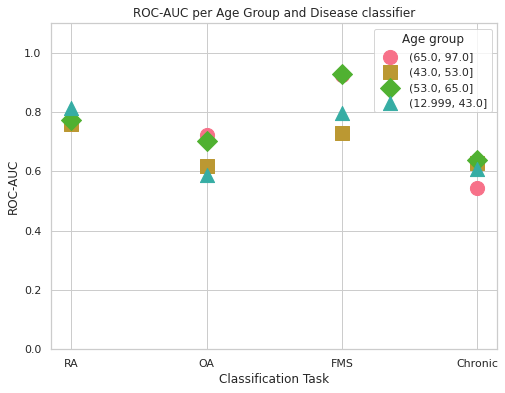

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

l_selection = []
# Set the style
sns.set(style="whitegrid")

# Create a color palette and markers
palette = sns.color_palette("husl", len(df_perf['Center'].unique()))
markers = ['o', 's', 'D', '^', 'X', 'p', 'H', '<', '*', 'P']

# Initialize the plot
plt.figure(figsize=(8, 6))

metric = 'ROC-AUC' #'CO_acc', 'ROC-AUC'  'PR-AUC'
 #'ROC-AUC'

# Plot each center with different markers and colors
for idx, center in enumerate(df_sub_age.sort_values(by='N')['Groupid'].unique()):
    center_data = df_sub_age[df_sub_age['Groupid'] == center].dropna(subset=[metric])
    print(idx, center)
    #print(center_data[metric])
    print('Pallette;', palette[idx])
    #print(markers[idx])
    plt.scatter(center_data['Task'], center_data[metric],
                label=center, color=palette[idx], marker=markers[idx], s=200)
    
# Add titles and labels
plt.title('%s per Age Group and Disease classifier' % metric)
plt.xlabel('Classification Task')
plt.ylabel('%s' % metric)
plt.legend(title='Age group')
plt.ylim(0, 1.1)

# Show plot
plt.show()

#### Show per Sex

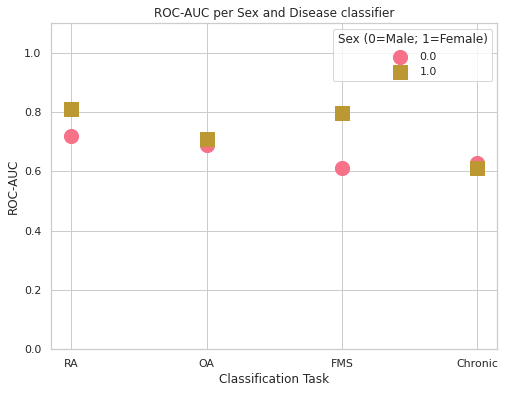

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

l_selection = []
# Set the style
sns.set(style="whitegrid")

# Create a color palette and markers
palette = sns.color_palette("husl", len(df_perf['Center'].unique()))
markers = ['o', 's', 'D', '^', 'X', 'p', 'H', '<', '*', 'P']

# Initialize the plot
plt.figure(figsize=(8, 6))

metric = 'ROC-AUC' #'CO_acc', 'ROC-AUC'  'PR-AUC'

# Plot each center with different markers and colors
for idx, center in enumerate(df_sub_sex.sort_values(by='N')['Groupid'].unique()):
    center_data = df_sub_sex[df_sub_sex['Groupid'] == center].dropna(subset=[metric])
    plt.scatter(center_data['Task'], center_data[metric],
                label=center, color=palette[idx], marker=markers[idx], s=200)
    
# Add titles and labels
plt.title('%s per Sex and Disease classifier' % metric)
plt.xlabel('Classification Task')
plt.ylabel('%s' % metric)
plt.legend(title='Sex (0=Male; 1=Female)')
plt.ylim(0, 1.1)

# Show plot
plt.show()

### Create dataset for annotation (by Rachel)

Goal : Rheumatologist (Rachel or Kasper?) will perform blinded annotation, to understand why referral letters are predictive. 
1) Does the GP already make a suggestions about diagnosis 
2) or is the GP oblivious to disease, but do his descriptions reveal the diagnosis. 

ToDo: Make sure to format text

In [ ]:
l_entities = ['RA', 'OA', 'FMS', 'Chronic']
N = 20
df_annotation = pd.DataFrame()

for ent in l_entities:
    #sample_ent_yes = df_train[df_train[ent]==1].sample(n=20, random_state=42) 
    #sample_ent_no = df_train[df_train[ent]==0].sample(n=20, random_state=42) 
    for pos in [0, 1]:
        new_pat = df_train[df_train[ent]==pos].sample(n=N, random_state=907)# 965
        if len(df_annotation) > 0: 
            new_pat = new_pat[new_pat['Identifier'].isin([pat for pat in new_pat['Identifier'] if pat not in df_annotation['Identifier'].unique()])]
            
        if N - len(new_pat) > 0 : # replace duplicates
            print('yea')
            new_pat = pd.concat([new_pat, df_train[df_train[ent]==pos].sample(n=N - len(new_pat) , random_state=34)])
        df_annotation = pd.concat([df_annotation,new_pat]) # 35
    #df_annotation = pd.concat([df_annotation, df_train[df_train[ent]==0].sample(n=20, random_state=35) ]) # 35

df_annotation = df_annotation.reset_index(drop=True)

# check if there are any duplicates by chance? 
print('Duplicates in the data: ', len(df_annotation) - len(df_annotation['Identifier'].unique()))

In [186]:
df_annotation['fixedLine_n10'] = df_annotation['fixedLine'].apply(lambda x : '. '.join(x.split('. ')[:10]))
df_annotation['fixedLine_n10']

l_cols =  ['Identifier', 'RA', 'OA', 'FMS', 'Chronic', 'fixedLine_n10']
l_cols_blind =  ['Identifier', 'fixedLine_n10']

# Assuming df is your DataFrame
df_annotation = df_annotation.sample(frac=1).reset_index(drop=True)

#df_annotation[l_cols].to_csv('../suppl/20240523_ZWN_annotation_GP_reasonOfReferral_labeled.csv', sep=';', index=None)
#df_annotation[l_cols_blind].to_csv('../suppl/20240523_ZWN_annotation_GP_reasonOfReferral_blind.csv', sep=';', index=None)

## Create baseline table

In [9]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('../proc/extra/df_train.csv')
df_test = pd.read_csv('../proc/extra/df_test.csv')
df_replication = pd.read_csv('../proc/extra/df_replication.csv')
df_demograph = pd.read_csv('../dict/Demographics_ALL.csv', sep=';')
df_referral = pd.read_csv('../proc/ZWN_referral_blinded_NER_thresh80.csv', sep='|')
df_referral = df_referral[((df_referral['before_firstVisit']) & (~df_referral['Locatie'].isna()))]

In [10]:
d_referral_delta = dict(zip(df_train['Identifier'], df_train['delta_referral_visit']))
d_referral_delta.update(dict(zip(df_test['Identifier'], df_test['delta_referral_visit'])))
d_referral_delta.update(dict(zip(df_replication['Identifier'], df_replication['delta_referral_visit'])))

d_referral_date = dict(zip(df_train['Identifier'], df_train['referral_date']))
d_referral_date.update(dict(zip(df_test['Identifier'], df_test['referral_date'])))
d_referral_date.update(dict(zip(df_replication['Identifier'], df_replication['referral_date'])))


df_demograph['deltaref'] = df_demograph['Identifier'].apply(lambda x : d_referral_delta[x] if x in d_referral_delta.keys() else np.nan)
df_demograph['referral_date'] = df_demograph['Identifier'].apply(lambda x : d_referral_date[x] if x in d_referral_date.keys() else np.nan)



In [11]:
import numpy as np

l_DAS28 = ['Pijn_pols L', 'Pijn_pols R', 'Pijn_pip 2 links hand', 'Pijn_pip 2 rechts hand', 'Pijn_pip 3 links hand', 'Pijn_pip 3 rechts hand',
 'Pijn_pip 4 links hand', 'Pijn_pip 4 rechts hand', 'Pijn_pip 5 links hand', 'Pijn_pip 5 rechts hand', 
 'Pijn_mcp 1 links', 'Pijn_mcp 1 rechts', 'Pijn_mcp 2 links', 'Pijn_mcp 2 rechts', 'Pijn_mcp 3 links', 'Pijn_mcp 3 rechts',
 'Pijn_mcp 4 links', 'Pijn_mcp 4 rechts', 'Pijn_mcp 5 links', 'Pijn_mcp 5 rechts', 'Pijn_schouder L', 'Pijn_schouder R', 'Pijn_Elleboog L','Pijn_elleboog R',
 'Pijn_knie links', 'Pijn_knie rechts', 
           
 'Zwelling_pols L', 'Zwelling_pols R', 'Zwelling_pip 2 links hand',  'Zwelling_pip 2 rechts hand',
 'Zwelling_pip 3 links hand',  'Zwelling_pip 3 rechts hand', 'Zwelling_pip 4 links hand', 'Zwelling_pip 4 rechts hand',  'Zwelling_pip 5 links hand',
 'Zwelling_pip 5 rechts hand',  'Zwelling_mcp 1 links', 'Zwelling_mcp 1 rechts', 'Zwelling_mcp 2 links', 'Zwelling_mcp 2 rechts', 'Zwelling_mcp 3 links', 'Zwelling_mcp 3 rechts',
 'Zwelling_mcp 4 links', 'Zwelling_mcp 4 rechts', 'Zwelling_mcp 5 links', 'Zwelling_mcp 5 rechts', 
 'Zwelling_knie links', 'Zwelling_knie rechts', 'Zwelling_schouder L', 'Zwelling_schouder R', 'Zwelling_Elleboog L',
  'Zwelling_elleboog R',
               
                   ]
l_DAS44 = l_DAS28 + [ 'Zwelling_sternoclaviculair L', 'Zwelling_sternoclaviculair R', 'Pijn_sternoclaviculair L', 'Pijn_sternoclaviculair R',
               'Zwelling_acromioclaviaculair L', 'Zwelling_acromioclaviaculair R', 'Pijn_acromioclaviaculair L', 'Pijn_acromioclaviaculair R',
                    'Pijn_onderste spronggewricht links', 'Pijn_onderste spronggewricht rechts', 'Pijn_bovenste spronggewicht links', 'Pijn_bovenste spronggewricht rechts',
             'Zwelling_onderste spronggewricht links', 'Zwelling_onderste spronggewricht rechts', 'Zwelling_bovenste spronggewicht links', 'Zwelling_bovenste spronggewricht rechts',
                'Pijn_mtp 2 links', 'Pijn_mtp 2 rechts', 'Pijn_mtp 3 links', 'Pijn_mtp 3 rechts', 'Pijn_mtp 4 links', 'Pijn_mtp 4 rechts',
 'Pijn_mtp 5 links', 'Pijn_mtp 5 rechts','Zwelling_mtp 2 links', 'Zwelling_mtp 2 rechts', 'Zwelling_mtp 3 links', 'Zwelling_mtp 3 rechts', 'Zwelling_mtp 4 links', 'Zwelling_mtp 4 rechts',
 'Zwelling_mtp 5 links', 'Zwelling_mtp 5 rechts',
              ]
    
metadata_rep = pd.read_csv('../extractions/20240205_Clustering/metadata_rzwn.csv', sep='|')

d_tjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Pijn' in col]].sum(axis=1)))
d_sjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Zwelling' in col]].sum(axis=1)))

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]

df_summary = pd.DataFrame(columns=['cluster', 'N', 'DMARD [n(%)]', 'Sex, F [n(%)]','Age (mean+-SD, yr)', 'BMI (mean+-SD)', 'RF [n(%)]', 'ACPA [n(%)]', 'ESR (median+-IQR)', 'CRP (median+-IQR)', 'SJC (median+-IQR)','TJC (median+-IQR)', 'DAS44', 'DAS28', 'Wait time, days (median+-IQR)', 'Visits (median+-IQR)', 'Follow Up (median+-IQR)',  'RF_na [n(%)]','ACPA_na [n(%)]', 'ESR_na [n(%)]' , 'CRP_na [n(%)]', 'SJC_na [n(%)]' , 'TJC_na [n(%)]', 'BMI_na [n(%)]', 'DAS44_na [n(%)]' , 'DAS28_na [n(%)]' ]) #TreatSwitch [n(%)]', 

def generate_baseline_ref(df_baseline, name = 'All'):
    return [name, '%.2f' % len(df_baseline['Identifier'].unique()), 
     '%.0f (%.1f)' % (len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]), (max(0.00001, len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]))/len(df_baseline))*100),
     '%.0f (%.1f)' % (np.sum(df_baseline['Sex']), np.mean(df_baseline['Sex']) * 100),  '%.1f (%.1f)' % (np.mean(df_baseline['Age']), np.std(df_baseline['Age'])), 
     '%.1f (%.1f)' % (np.mean(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw']), np.std(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw'])),
     
     '%.0f (%.1f)' % (np.sum(df_baseline['RF']), np.mean(df_baseline['RF']) * 100), 
     '%.0f (%.1f)' % (np.sum(df_baseline['ACPA']), np.mean(df_baseline['ACPA']) * 100),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw']), IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[0], IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw']), IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[0], IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['SJC'].isna()]['SJC']), IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[0], IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[1]) if len(df_baseline[~df_baseline['SJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['TJC'].isna()]['TJC']), IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[0], IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[1]) if len(df_baseline[~df_baseline['TJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS44'].isna()]['DAS44']), IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[0], IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[1]) if len(df_baseline[~df_baseline['DAS44'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS28'].isna()]['DAS28']), IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[0], IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[1]) if len(df_baseline[~df_baseline['DAS28'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['deltaref'].isna()]['deltaref']), IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[0], IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[1]), 
            '%.1f (%.1f-%.1f)' % (np.median(df_baseline['Visits']), IQR(df_baseline['Visits'])[0], IQR(df_baseline['Visits'])[1]),
            '%.1f (%.1f-%.1f)' % (np.median(df_baseline['FollowUp']), IQR(df_baseline['FollowUp'])[0], IQR(df_baseline['FollowUp'])[1]),

     '%.0f (%.1f)' % (len(df_baseline[df_baseline['RF'].isna()]), (len(df_baseline[df_baseline['RF'].isna()])/len(df_baseline))*100), '%.0f (%.1f)' % (len(df_baseline[df_baseline['ACPA'].isna()]), (len(df_baseline[df_baseline['ACPA'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['ESR_raw'].isna()]), (len(df_baseline[df_baseline['ESR_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['CRP_raw'].isna()]), (len(df_baseline[df_baseline['CRP_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['SJC'].isna()]), (len(df_baseline[df_baseline['SJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['TJC'].isna()]), (len(df_baseline[df_baseline['TJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['BMI_raw'].isna()]), (len(df_baseline[df_baseline['BMI_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS44'].isna()]), (len(df_baseline[df_baseline['DAS44'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS28'].isna()]), (len(df_baseline[df_baseline['DAS28'].isna()])/len(df_baseline))*100),
           
           ]

def calculate_DAS44(tjc, sjc, esr):
    """
    Calculate DAS44 with 3 variables : RAI, SJC and ESR (BSE)
    """

    das44= (0.53938 * np.sqrt(tjc) + 0.0650 * (sjc) + 0.330 * np.log(esr)) + 0.224 #0.224
    return das44

def calculate_DAS28(tjc, sjc, esr):
    """
    Calculate DAS28 with 3 variables : TJC, SJC and ESR (BSE)
    """
    das28 = (0.56 * np.sqrt(tjc) + 0.28 * np.sqrt(sjc) + 0.70 * np.log(esr)) * 1.08 + 0.16
    return das28

df_demograph['DAS44'] = df_demograph.apply(lambda x : calculate_DAS44(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)
df_demograph['DAS28'] = df_demograph.apply(lambda x : calculate_DAS28(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)

df_summary.loc[0] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_train['Identifier'])], 'train')
df_summary.loc[1] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_test['Identifier'])], 'holdout')
df_summary.loc[2] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_replication['Identifier'])], 'replication')

df_summary = df_summary.reset_index(drop=True)
df_summary.T

,0,1,2
cluster,train,holdout,replication
N,4097.00,1016.00,615.00
DMARD [n(%)],664 (16.0),170 (16.5),104 (16.7)
"Sex, F [n(%)]",2812 (67.8),699 (68.0),405 (65.2)
"Age (mean+-SD, yr)",54.1 (16.4),53.4 (16.0),54.7 (17.2)
BMI (mean+-SD),27.5 (5.4),27.1 (4.9),27.2 (5.4)
RF [n(%)],783 (36.8),197 (36.5),113 (39.2)
ACPA [n(%)],402 (18.9),101 (18.7),69 (24.0)
ESR (median+-IQR),10.0 (5.0-20.0),10.0 (5.0-20.0),9.0 (5.0-19.0)
CRP (median+-IQR),3.0 (2.0-8.0),3.0 (2.0-9.0),4.0 (2.0-7.0)


#### count number of letters per identifier

In [ ]:

# Convert the Series to a DataFrame
letters_per_identifier =df_referral.groupby('Identifier').size()
letters_per_identifier_df = letters_per_identifier.reset_index(name='count')
print("\nLetters per identifier (DataFrame):")
print(letters_per_identifier_df)
d_no_letters = dict(zip(letters_per_identifier_df['Identifier'], letters_per_identifier_df['count']))
df_demograph['noLetters'] = df_demograph['Identifier'].apply(lambda x : d_no_letters[x] if x in d_no_letters.keys() else 0)


no_diag = df_referral.groupby('Identifier').sum()
#d_class = dict(zip(no_diag.index, no_diag['Category']))
d_chronic = dict(zip(no_diag.index, no_diag['Chronic']))
d_ra = dict(zip(no_diag.index, no_diag['RA']))
d_oa = dict(zip(no_diag.index, no_diag['OA']))
d_fms = dict(zip(no_diag.index, no_diag['FMS']))

# Normalize per letters
df_demograph['Chronic'] = df_demograph['Identifier'].apply(lambda x : d_chronic[x] if x in d_chronic.keys() else np.nan)
df_demograph['RA'] = df_demograph['Identifier'].apply(lambda x : d_ra[x] if x in d_ra.keys() else np.nan)
df_demograph['OA'] = df_demograph['Identifier'].apply(lambda x : d_oa[x] if x in d_oa.keys() else np.nan)
df_demograph['FMS'] = df_demograph['Identifier'].apply(lambda x : d_fms[x] if x in d_oa.keys() else np.nan)

### Create table for data characteristics

In [13]:
import numpy as np

l_DAS28 = ['Pijn_pols L', 'Pijn_pols R', 'Pijn_pip 2 links hand', 'Pijn_pip 2 rechts hand', 'Pijn_pip 3 links hand', 'Pijn_pip 3 rechts hand',
 'Pijn_pip 4 links hand', 'Pijn_pip 4 rechts hand', 'Pijn_pip 5 links hand', 'Pijn_pip 5 rechts hand', 
 'Pijn_mcp 1 links', 'Pijn_mcp 1 rechts', 'Pijn_mcp 2 links', 'Pijn_mcp 2 rechts', 'Pijn_mcp 3 links', 'Pijn_mcp 3 rechts',
 'Pijn_mcp 4 links', 'Pijn_mcp 4 rechts', 'Pijn_mcp 5 links', 'Pijn_mcp 5 rechts', 'Pijn_schouder L', 'Pijn_schouder R', 'Pijn_Elleboog L','Pijn_elleboog R',
 'Pijn_knie links', 'Pijn_knie rechts', 
           
 'Zwelling_pols L', 'Zwelling_pols R', 'Zwelling_pip 2 links hand',  'Zwelling_pip 2 rechts hand',
 'Zwelling_pip 3 links hand',  'Zwelling_pip 3 rechts hand', 'Zwelling_pip 4 links hand', 'Zwelling_pip 4 rechts hand',  'Zwelling_pip 5 links hand',
 'Zwelling_pip 5 rechts hand',  'Zwelling_mcp 1 links', 'Zwelling_mcp 1 rechts', 'Zwelling_mcp 2 links', 'Zwelling_mcp 2 rechts', 'Zwelling_mcp 3 links', 'Zwelling_mcp 3 rechts',
 'Zwelling_mcp 4 links', 'Zwelling_mcp 4 rechts', 'Zwelling_mcp 5 links', 'Zwelling_mcp 5 rechts', 
 'Zwelling_knie links', 'Zwelling_knie rechts', 'Zwelling_schouder L', 'Zwelling_schouder R', 'Zwelling_Elleboog L',
  'Zwelling_elleboog R',
               
               #  'Pijn_IP links', 'Pijn_IP rechts',  'Zwelling_IP links', 'Zwelling_IP rechts',
                   ]
l_DAS44 = l_DAS28 + [ 'Zwelling_sternoclaviculair L', 'Zwelling_sternoclaviculair R', 'Pijn_sternoclaviculair L', 'Pijn_sternoclaviculair R',
               'Zwelling_acromioclaviaculair L', 'Zwelling_acromioclaviaculair R', 'Pijn_acromioclaviaculair L', 'Pijn_acromioclaviaculair R',
                    'Pijn_onderste spronggewricht links', 'Pijn_onderste spronggewricht rechts', 'Pijn_bovenste spronggewicht links', 'Pijn_bovenste spronggewricht rechts',
             'Zwelling_onderste spronggewricht links', 'Zwelling_onderste spronggewricht rechts', 'Zwelling_bovenste spronggewicht links', 'Zwelling_bovenste spronggewricht rechts',
                'Pijn_mtp 2 links', 'Pijn_mtp 2 rechts', 'Pijn_mtp 3 links', 'Pijn_mtp 3 rechts', 'Pijn_mtp 4 links', 'Pijn_mtp 4 rechts',
 'Pijn_mtp 5 links', 'Pijn_mtp 5 rechts','Zwelling_mtp 2 links', 'Zwelling_mtp 2 rechts', 'Zwelling_mtp 3 links', 'Zwelling_mtp 3 rechts', 'Zwelling_mtp 4 links', 'Zwelling_mtp 4 rechts',
 'Zwelling_mtp 5 links', 'Zwelling_mtp 5 rechts',
              ]
    
metadata_rep = pd.read_csv('../extractions/20240205_Clustering/metadata_rzwn.csv', sep='|')

d_tjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Pijn' in col]].sum(axis=1)))
d_sjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Zwelling' in col]].sum(axis=1)))

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]
#'Wait time, days (median+-IQR)', 
df_summary = pd.DataFrame(columns=['cluster', 'N letters', 'pat', 'DMARD [n(%)]', 'Sex, F [n(%)]','Age (mean+-SD, yr)', 'n RA (% n)', 'n OA (% n)', 'n FMS (% n)',  'n Chronic (% n)', 'Wait time, days (median+-IQR)', 'Visits (median+-IQR)', 'Follow Up (median+-IQR)']) #TreatSwitch [n(%)]', 

def generate_baseline_ref(df_baseline, name = 'All'):
    return [name,  '%.2f' % df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum(), '%.2f' % len(df_baseline['Identifier'].unique()), 
     '%.0f (%.1f)' % (len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]), (max(0.00001, len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]))/len(df_baseline))*100),
     '%.0f (%.1f)' % (np.sum(df_baseline['Sex']), np.mean(df_baseline['Sex']) * 100),  '%.1f (%.1f)' % (np.mean(df_baseline['Age']), np.std(df_baseline['Age'])), 
            
     '%.0f (%.1f)' %  (df_baseline['RA'].sum(), (df_baseline['RA'].sum()/df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum())*100),
     '%.0f (%.1f)' %  (df_baseline['OA'].sum(), (df_baseline['OA'].sum()/df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum())*100), 
     '%.0f (%.1f)' %  (df_baseline['FMS'].sum(), (df_baseline['FMS'].sum()/df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum())*100), 
     '%.0f (%.1f)' % (df_baseline['Chronic'].sum(), (df_baseline['Chronic'].sum()/df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum())*100), 
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['deltaref'].isna()]['deltaref']), IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[0], IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[1]), 
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['Visits'].isna()]['Visits']), IQR(df_baseline[~df_baseline['Visits'].isna()]['Visits'])[0], IQR(df_baseline[~df_baseline['Visits'].isna()]['Visits'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['FollowUp'].isna()]['FollowUp']), IQR(df_baseline[~df_baseline['FollowUp'].isna()]['FollowUp'])[0], IQR(df_baseline[~df_baseline['FollowUp'].isna()]['FollowUp'])[1]),
     
           ]

def calculate_DAS44(tjc, sjc, esr):
    """
    Calculate DAS44 with 3 variables : RAI, SJC and ESR (BSE)
    """

    das44= (0.53938 * np.sqrt(tjc) + 0.0650 * (sjc) + 0.330 * np.log(esr)) + 0.224 #0.224
    return das44

def calculate_DAS28(tjc, sjc, esr):
    """
    Calculate DAS28 with 3 variables : TJC, SJC and ESR (BSE)
    """
    das28 = (0.56 * np.sqrt(tjc) + 0.28 * np.sqrt(sjc) + 0.70 * np.log(esr)) * 1.08 + 0.16
    return das28

df_demograph['DAS44'] = df_demograph.apply(lambda x : calculate_DAS44(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)
df_demograph['DAS28'] = df_demograph.apply(lambda x : calculate_DAS28(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)


df_summary.loc[0] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_train['Identifier'])], 'train')
df_summary.loc[1] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_test['Identifier'])], 'holdout')
df_summary.loc[2] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_replication['Identifier'])], 'replication')

df_summary = df_summary.reset_index(drop=True)
df_summary.T

,0,1,2
cluster,train,holdout,replication
N letters,5039.00,1225.00,831.00
pat,4097.00,1016.00,615.00
DMARD [n(%)],664 (16.0),170 (16.5),104 (16.7)
"Sex, F [n(%)]",2812 (67.8),699 (68.0),405 (65.2)
"Age (mean+-SD, yr)",54.1 (16.4),53.4 (16.0),54.7 (17.2)
n RA (% n),422 (8.4),100 (8.2),90 (10.8)
n OA (% n),1140 (22.6),262 (21.4),218 (26.2)
n FMS (% n),296 (5.9),79 (6.4),37 (4.5)
n Chronic (% n),2790 (55.4),669 (54.6),448 (53.9)


In [15]:
d_label = ['Male', 'Female']
for i, g in enumerate([0, 1]):

    df_summary.loc[i] = generate_baseline_ref(df_demograph[((df_demograph['deltaref']>-1) & (df_demograph['Sex']==g))], d_label[i])
    #df_summary.loc[1] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_test['Identifier'])], 'holdout')
    #df_summary.loc[2] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_replication['Identifier'])], 'replication')

df_summary = df_summary.reset_index(drop=True)
df_summary.T[[0, 1]]

,0,1
cluster,Male,Female
N letters,2246.00,4849.00
pat,1863.00,3865.00
DMARD [n(%)],382 (20.3),556 (14.2)
"Sex, F [n(%)]",0 (0.0),3916 (100.0)
"Age (mean+-SD, yr)",57.0 (15.8),52.6 (16.5)
n RA (% n),225 (10.0),387 (8.0)
n OA (% n),373 (16.6),1247 (25.7)
n FMS (% n),11 (0.5),401 (8.3)
n Chronic (% n),1423 (63.4),2484 (51.2)


In [ ]:
# Create a new column 'age_group' with the age categories
df_demograph['age_group'] = pd.qcut(df_demograph['Age'], q=4)
df_demograph['age_group']

In [19]:
d_label = df_demograph['age_group'].unique()
for i, g in enumerate(d_label):

    df_summary.loc[i] = generate_baseline_ref(df_demograph[((df_demograph['deltaref']>-1) & (df_demograph['age_group']==g))], d_label[i])

df_summary = df_summary.reset_index(drop=True)
df_summary.T[[0, 1, 2,3]]

,0,1,2,3
cluster,"(44.0, 55.0]","(55.0, 67.0]","(67.0, 100.0]","(3.999, 44.0]"
N letters,1815.00,1804.00,1586.00,1890.00
pat,1429.00,1460.00,1315.00,1524.00
DMARD [n(%)],203 (13.9),273 (18.5),272 (20.5),190 (12.4)
"Sex, F [n(%)]",1066 (73.2),900 (61.1),801 (60.4),1149 (74.7)
"Age (mean+-SD, yr)",50.5 (3.1),61.0 (3.4),75.1 (5.5),32.5 (8.2)
n RA (% n),125 (6.9),171 (9.5),222 (14.0),94 (5.0)
n OA (% n),390 (21.5),656 (36.4),497 (31.3),77 (4.1)
n FMS (% n),154 (8.5),62 (3.4),10 (0.6),186 (9.8)
n Chronic (% n),903 (49.8),992 (55.0),1106 (69.7),906 (47.9)


### Create table for patient characteristics

In [17]:
import numpy as np

l_DAS28 = ['Pijn_pols L', 'Pijn_pols R', 'Pijn_pip 2 links hand', 'Pijn_pip 2 rechts hand', 'Pijn_pip 3 links hand', 'Pijn_pip 3 rechts hand',
 'Pijn_pip 4 links hand', 'Pijn_pip 4 rechts hand', 'Pijn_pip 5 links hand', 'Pijn_pip 5 rechts hand', 
 'Pijn_mcp 1 links', 'Pijn_mcp 1 rechts', 'Pijn_mcp 2 links', 'Pijn_mcp 2 rechts', 'Pijn_mcp 3 links', 'Pijn_mcp 3 rechts',
 'Pijn_mcp 4 links', 'Pijn_mcp 4 rechts', 'Pijn_mcp 5 links', 'Pijn_mcp 5 rechts', 'Pijn_schouder L', 'Pijn_schouder R', 'Pijn_Elleboog L','Pijn_elleboog R',
 'Pijn_knie links', 'Pijn_knie rechts', 
           
 'Zwelling_pols L', 'Zwelling_pols R', 'Zwelling_pip 2 links hand',  'Zwelling_pip 2 rechts hand',
 'Zwelling_pip 3 links hand',  'Zwelling_pip 3 rechts hand', 'Zwelling_pip 4 links hand', 'Zwelling_pip 4 rechts hand',  'Zwelling_pip 5 links hand',
 'Zwelling_pip 5 rechts hand',  'Zwelling_mcp 1 links', 'Zwelling_mcp 1 rechts', 'Zwelling_mcp 2 links', 'Zwelling_mcp 2 rechts', 'Zwelling_mcp 3 links', 'Zwelling_mcp 3 rechts',
 'Zwelling_mcp 4 links', 'Zwelling_mcp 4 rechts', 'Zwelling_mcp 5 links', 'Zwelling_mcp 5 rechts', 
 'Zwelling_knie links', 'Zwelling_knie rechts', 'Zwelling_schouder L', 'Zwelling_schouder R', 'Zwelling_Elleboog L',
  'Zwelling_elleboog R',
               
               #  'Pijn_IP links', 'Pijn_IP rechts',  'Zwelling_IP links', 'Zwelling_IP rechts',
                   ]
l_DAS44 = l_DAS28 + [ 'Zwelling_sternoclaviculair L', 'Zwelling_sternoclaviculair R', 'Pijn_sternoclaviculair L', 'Pijn_sternoclaviculair R',
               'Zwelling_acromioclaviaculair L', 'Zwelling_acromioclaviaculair R', 'Pijn_acromioclaviaculair L', 'Pijn_acromioclaviaculair R',
                    'Pijn_onderste spronggewricht links', 'Pijn_onderste spronggewricht rechts', 'Pijn_bovenste spronggewicht links', 'Pijn_bovenste spronggewricht rechts',
             'Zwelling_onderste spronggewricht links', 'Zwelling_onderste spronggewricht rechts', 'Zwelling_bovenste spronggewicht links', 'Zwelling_bovenste spronggewricht rechts',
                'Pijn_mtp 2 links', 'Pijn_mtp 2 rechts', 'Pijn_mtp 3 links', 'Pijn_mtp 3 rechts', 'Pijn_mtp 4 links', 'Pijn_mtp 4 rechts',
 'Pijn_mtp 5 links', 'Pijn_mtp 5 rechts','Zwelling_mtp 2 links', 'Zwelling_mtp 2 rechts', 'Zwelling_mtp 3 links', 'Zwelling_mtp 3 rechts', 'Zwelling_mtp 4 links', 'Zwelling_mtp 4 rechts',
 'Zwelling_mtp 5 links', 'Zwelling_mtp 5 rechts',
              ]
    
metadata_rep = pd.read_csv('../extractions/20240205_Clustering/metadata_rzwn.csv', sep='|')

d_tjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Pijn' in col]].sum(axis=1)))
d_sjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Zwelling' in col]].sum(axis=1)))

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]
#'Wait time, days (median+-IQR)', 
df_summary = pd.DataFrame(columns=['cluster', 'pat',  'N', 'DMARD [n(%)]', 'Sex, F [n(%)]','Age (mean+-SD, yr)', 'BMI (mean+-SD)', 'RF [n(%)]', 'ACPA [n(%)]', 'ESR (median+-IQR)', 'CRP (median+-IQR)', 'SJC (median+-IQR)','TJC (median+-IQR)', 'DAS44', 'DAS28', 'Wait time, days (median+-IQR)', 'Visits (median+-IQR)', 'Follow Up (median+-IQR)', 'pat RA (%)', 'pat OA (%)', 'pat FMS (%)',  'pat Chronic (%)', 'RF_na [n(%)]','ACPA_na [n(%)]', 'ESR_na [n(%)]' , 'CRP_na [n(%)]', 'SJC_na [n(%)]' , 'TJC_na [n(%)]', 'BMI_na [n(%)]', 'DAS44_na [n(%)]' , 'DAS28_na [n(%)]' ]) #TreatSwitch [n(%)]', 

def generate_baseline_ref(df_baseline, name = 'All'):
    return [name, '%.2f' % len(df_baseline['Identifier'].unique()), '%.2f' % df_baseline.drop_duplicates(subset='Identifier')['noLetters'].sum(), 
     '%.0f (%.1f)' % (len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]), (max(0.00001, len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]))/len(df_baseline))*100),
     '%.0f (%.1f)' % (np.sum(df_baseline['Sex']), np.mean(df_baseline['Sex']) * 100),  '%.1f (%.1f)' % (np.mean(df_baseline['Age']), np.std(df_baseline['Age'])), 
     '%.1f (%.1f)' % (np.mean(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw']), np.std(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw'])),
     
     '%.0f (%.1f)' % (np.sum(df_baseline['RF']), np.mean(df_baseline['RF']) * 100), 
     '%.0f (%.1f)' % (np.sum(df_baseline['ACPA']), np.mean(df_baseline['ACPA']) * 100),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw']), IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[0], IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw']), IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[0], IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['SJC'].isna()]['SJC']), IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[0], IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[1]) if len(df_baseline[~df_baseline['SJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['TJC'].isna()]['TJC']), IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[0], IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[1]) if len(df_baseline[~df_baseline['TJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS44'].isna()]['DAS44']), IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[0], IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[1]) if len(df_baseline[~df_baseline['DAS44'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS28'].isna()]['DAS28']), IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[0], IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[1]) if len(df_baseline[~df_baseline['DAS28'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['deltaref'].isna()]['deltaref']), IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[0], IQR(df_baseline[~df_baseline['deltaref'].isna()]['deltaref'])[1]), 
            '%.1f (%.1f-%.1f)' % (np.median(df_baseline['Visits']), IQR(df_baseline['Visits'])[0], IQR(df_baseline['Visits'])[1]),
            '%.1f (%.1f-%.1f)' % (np.median(df_baseline['FollowUp']), IQR(df_baseline['FollowUp'])[0], IQR(df_baseline['FollowUp'])[1]),
     
     '%.0f (%.1f)' %  (np.count_nonzero(df_baseline['RA']), (np.count_nonzero(df_baseline['RA'])/len(df_baseline)*100)),
     '%.0f (%.1f)' %  (np.count_nonzero(df_baseline['OA']), (np.count_nonzero(df_baseline['OA'])/len(df_baseline)*100)),
     '%.0f (%.1f)' %  (np.count_nonzero(df_baseline['FMS']), (np.count_nonzero(df_baseline['FMS'])/len(df_baseline)*100)),
     '%.0f (%.1f)' % (np.count_nonzero(df_baseline['Chronic']), (np.count_nonzero(df_baseline['Chronic'])/len(df_baseline)*100)),
      
            
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['RF'].isna()]), (len(df_baseline[df_baseline['RF'].isna()])/len(df_baseline))*100), '%.0f (%.1f)' % (len(df_baseline[df_baseline['ACPA'].isna()]), (len(df_baseline[df_baseline['ACPA'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['ESR_raw'].isna()]), (len(df_baseline[df_baseline['ESR_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['CRP_raw'].isna()]), (len(df_baseline[df_baseline['CRP_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['SJC'].isna()]), (len(df_baseline[df_baseline['SJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['TJC'].isna()]), (len(df_baseline[df_baseline['TJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['BMI_raw'].isna()]), (len(df_baseline[df_baseline['BMI_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS44'].isna()]), (len(df_baseline[df_baseline['DAS44'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS28'].isna()]), (len(df_baseline[df_baseline['DAS28'].isna()])/len(df_baseline))*100),
           
           ]

def calculate_DAS44(tjc, sjc, esr):
    """
    Calculate DAS44 with 3 variables : RAI, SJC and ESR (BSE)
    """

    das44= (0.53938 * np.sqrt(tjc) + 0.0650 * (sjc) + 0.330 * np.log(esr)) + 0.224 #0.224
    return das44

def calculate_DAS28(tjc, sjc, esr):
    """
    Calculate DAS28 with 3 variables : TJC, SJC and ESR (BSE)
    """
    das28 = (0.56 * np.sqrt(tjc) + 0.28 * np.sqrt(sjc) + 0.70 * np.log(esr)) * 1.08 + 0.16
    return das28

df_demograph['DAS44'] = df_demograph.apply(lambda x : calculate_DAS44(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)
df_demograph['DAS28'] = df_demograph.apply(lambda x : calculate_DAS28(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)

df_summary.loc[0] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_train['Identifier'])], 'train')
df_summary.loc[1] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_test['Identifier'])], 'holdout')
df_summary.loc[2] = generate_baseline_ref(df_demograph[df_demograph['Identifier'].isin(df_replication['Identifier'])], 'replication')

df_summary = df_summary.reset_index(drop=True)
df_summary.T

,0,1,2
cluster,train,holdout,replication
pat,4097.00,1016.00,615.00
N,5039.00,1225.00,831.00
DMARD [n(%)],664 (16.0),170 (16.5),104 (16.7)
"Sex, F [n(%)]",2812 (67.8),699 (68.0),405 (65.2)
"Age (mean+-SD, yr)",54.1 (16.4),53.4 (16.0),54.7 (17.2)
BMI (mean+-SD),27.5 (5.4),27.1 (4.9),27.2 (5.4)
RF [n(%)],783 (36.8),197 (36.5),113 (39.2)
ACPA [n(%)],402 (18.9),101 (18.7),69 (24.0)
ESR (median+-IQR),10.0 (5.0-20.0),10.0 (5.0-20.0),9.0 (5.0-19.0)


### Acquire original letter content

In [ ]:
import pandas as pd
df_train = pd.read_csv('../proc/extra/df_train_RA_old.csv')
df_test = pd.read_csv('../proc/extra/df_test_RA_old.csv')
df_replication = pd.read_csv('../proc/extra/df_replication_old.csv')
df_demograph = pd.read_csv('../dict/Demographics_ALL.csv', sep=';')

df_train[['RA', 'OA', 'FMS', 'Chronic']]

## Evaluation GP vs ML 

In [29]:
import pandas as pd

df_annotation = pd.read_csv('../suppl/20240523_ZWN_annotation_GP_reasonOfReferral_labeled.csv', sep=';')
df_annotation_rk = pd.read_csv('../suppl/20240523_ZWN_annotation_GP_reasonOfReferral_blind_RK.csv', sep=';', encoding = "ISO-8859-1")
df_annotation_rk = df_annotation_rk.rename(columns={'FM': 'FMS'})

In [30]:
# Define function to check if text in df1 starts with prefix in df2
def match_prefix(row, df2):
    for prefix in df2['fixedLine_n10']:
        if row['fixedLine'].startswith(prefix):
            return prefix
    return None

# Apply the function to create a new column in df1 with the matched prefix
df_train['matched_prefix'] = df_train.apply(match_prefix, axis=1, df2=df_annotation)

# Filter rows where a match was found
matched_df = df_train[df_train['matched_prefix'].notnull()]

d_full_text = dict(zip(matched_df['Identifier'], matched_df['fixedLine']))

# Apply the function to create a new column in df1 with the matched prefix
df_test['matched_prefix'] = df_test.apply(match_prefix, axis=1, df2=df_annotation)
matched_df = df_test[df_test['matched_prefix'].notnull()]
d_full_text = {**d_full_text, **dict(zip(matched_df['Identifier'], matched_df['fixedLine']))}

# Apply the function to create a new column in df1 with the matched prefix
df_replication['matched_prefix'] = df_replication.apply(match_prefix, axis=1, df2=df_annotation)
matched_df = df_replication[df_replication['matched_prefix'].notnull()]
d_full_text = {**d_full_text, **dict(zip(matched_df['Identifier'], matched_df['fixedLine']))}


In [31]:
import numpy as np
df_comparison = df_annotation.merge(df_annotation_rk[['Unnamed: 1',  'RA', 'OA', 'FMS', 'Chronic']], how='inner', left_index=True, right_index=True)
df_comparison['Chronic_y'] = df_comparison['Chronic_y'].replace('?', np.nan)
df_comparison['Chronic_y'] = df_comparison['Chronic_y'].astype(float)
df_comparison = df_comparison.rename(columns={'RA_x' : 'RA_true', 'RA_y' : 'RA_GP', 'Chronic_x' : 'Chronic_true', 'Chronic_y' : 'Chronic_GP', 'OA_x' : 'OA_true', 'OA_y' : 'OA_GP', 'FMS_x' : 'FMS_true', 'FMS_y' : 'FMS_GP'})
df_comparison['fixedLine'] = df_comparison['Identifier'].apply(lambda x: d_full_text[x] )

In [32]:
#import collections.OrderedDict
from collections import Counter
from typing_extensions import OrderedDict

def sortedPredictionList(b_pred, y_test):
    """
    This function sorts the list of true labels by the
    list of predictions. The sorted list of true labels
    can be used to create a ROC-curve for a non-probability
    classifier (a.k.a. a binary classifier like decision tree).

    Input:
        b_pred = list of hard-predictions (0 or 1) 
            or probabilities (0-1)
        y_test = list of actual labels, binarized to 
            1 or 0. 

    Example for generating 'l_sorted_true':
        Before sort:
           pred: 0 1 1 0 1 0 1 0 1 1 1 0 1 0
           true: 0 1 0 0 1 0 0 1 1 0 1 0 1 1
        After sort:
           pred: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
        -> true: 1 1 0 1 0 0 1 1 0 0 1 1 0 0

    Output:
        l_sorted_true = list of true label sorted on the 
            predictions label:
    """
    pred, y_test = list(b_pred.astype(int)), list(y_test)
    df_pred = pd.DataFrame(pred, y_test).reset_index()
    df_pred.columns = ['pred', 'true']
    df_pred = df_pred.sort_values(by='pred', ascending=False) #.to_csv('')
    return list(df_pred['pred']),  list(df_pred['true'])

def infer_binary(pred, y_test):
    #print(pred, y_test)
    l_pred, l_true = sortedPredictionList(pred, y_test)
    dummi = l_pred
    dummi = [2 if x==0 else x for x in dummi]
    dummi = [x -1 for x in dummi]
    l_pred.insert(0,0)
    l_true.insert(0,0)
    dummi.insert(0,0)
    # Compute basic statistics:
    TP = pd.Series(l_true).cumsum()
    FP = pd.Series(dummi).cumsum()
    P = sum(l_true)
    N = sum(dummi)
    TPR = TP.divide(P) # sensitivity / hit rate / recall
    FPR = FP.divide(N)  # fall-out
    PRC = TP.divide(TP + FP) # precision
    F1 = 2 * (PRC * TPR) / (PRC + TPR)
    d_conf = {'tpr': TPR, 'fpr': FPR, 'prc': PRC, 'threshold': l_pred, 'f1': F1}
    #d_conf = {'tpr': TPR, 'fpr': FPR, 'prc': PRC, 'threshold': l_pred}
    return d_conf

def scoresCM(CM):
    """
    Derive performance characteristics from the confusion matrix
    """
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return {'tpr': TPR, 'tnr': TNR,'ppv': PPV, 'npv': NPV, 'fpr': FPR, 'fnr' : FNR, 'fdr' : FDR, 'acc' : ACC} 


### Acquire probabilities by models

In [179]:
import pickle
import xgboost as xgb
TARGET = 'FMS'

for TARGET in ['Chronic', 'FMS', 'RA', 'OA']:
    with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/tfidf/tfidf_vectorizer_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
        tfidf_vectorizer = pickle.load(fin)

    with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/xgb/xgb_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
        bst = pickle.load(fin)

    X_feat_test = tfidf_vectorizer.transform(df_comparison['fixedLine'])
    dtest = xgb.DMatrix(X_feat_test) 
    df_comparison['pred%s' % TARGET] = bst.predict(dtest)

### Compare GP to final diag

No of total patient letters:  160
No of patient letters annotated (excluding "9" and nan):  121
No of RA cases (excluding "9" and nan):  21  (prev=0.17)
tpr = 0.42; tnr = 0.87; ppv = 0.38; npv = 0.89; fpr = 0.13; fnr = 0.58; fdr = 0.62; acc = 0.80


Text(21.5, 0.5, 'Specialist RA dx')

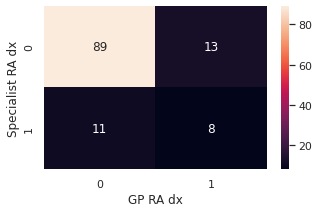

In [176]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

DIAG = 'RA' #'Chronic'#'Chronic', 'RA', 'OA', 'FMS'

df_sub = df_comparison.copy()
df_sub= df_sub.dropna(subset=['%s_true' % DIAG, '%s_GP' % DIAG])
df_sub= df_sub[~df_sub['%s_GP' % DIAG].isin([9])].copy()

cm = confusion_matrix(df_sub['%s_GP' % DIAG], df_sub['%s_true' % DIAG]).astype('float')
accuracy = accuracy_score(df_sub['%s_GP' % DIAG], df_sub['%s_true' % DIAG]).astype('float')

d_scores = scoresCM(cm)
print('No of total patient letters: ', len(df_comparison))
print('No of patient letters annotated (excluding "9" and nan): ', len(df_sub))
print('No of %s cases (excluding "9" and nan): ' % DIAG, len(df_sub[df_sub['%s_true' % DIAG]==1]), ' (prev=%.2f)' % (len(df_sub[df_sub['%s_true' % DIAG]==1]) / len(df_sub)))
print('; '.join(['%s = %.2f' % (k, d_scores[k]) for k in d_scores.keys()]))

df_cm = pd.DataFrame(cm, index = list(range(len(df_sub['%s_true' % DIAG].unique()))),
                  columns = list(range(len(df_sub['%s_true' % DIAG].unique()))))
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("GP %s dx" % DIAG)
plt.ylabel("Specialist %s dx" % DIAG )
#plt.title('Confusion matrix for the XGBoost classifier - both categorical + numerical (ACC: %.2f)' % (accuracy))

### Visualize performance GP & ML-method to final diag

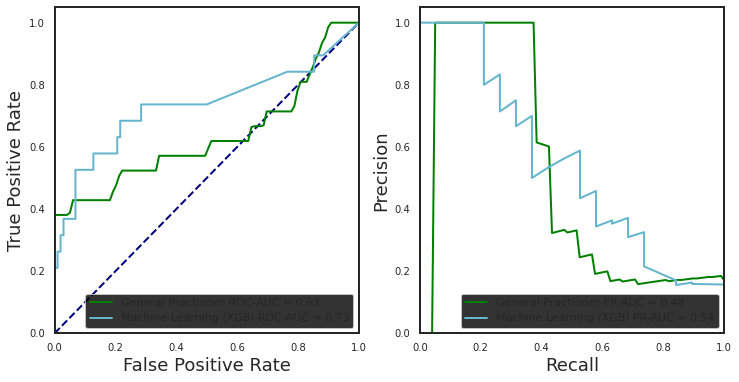

In [177]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import re

fig1, ax1 = plt.subplots(1,2,figsize=(12,6))

clf_name = 'XGBoost (Machine learning)'

# Define prediction:
y_pred = df_sub['%s_true' % DIAG].values # OUTCOME CNN MODEL (Progression: Was SvdH smaller at baseline?)
y_actual = df_sub['%s_GP' % DIAG].values  # Was SvdH reported as smaller at baseline? (according to BeST)
y_pred_xgb = df_sub['pred%s' % DIAG].values 


# For XGB
fpr_v, tpr_v, _ = roc_curve(y_actual, y_pred_xgb) # np.array([binarize(val) for val in y_actual])
prec_v, recall_v, _ = precision_recall_curve(y_actual, y_pred_xgb) # y, y_pred

pr_auc_v = auc(recall_v, prec_v)
roc_auc_v = auc(fpr_v, tpr_v)

# Binary classifier
d_conf = infer_binary(y_pred, y_actual)

# calculate AUC
tpr_prog = d_conf['tpr']
fpr_prog = d_conf['fpr']
roc_auc_prog = auc(d_conf['fpr'], d_conf['tpr'])

# calculate PR-AUC
recall_scale = np.linspace(0, 1, 100)
prc_interp = np.interp(recall_scale, d_conf['tpr'], d_conf['prc'])

# fill all nan
prc_interp = [0 if i != i else i for i in prc_interp ]

pr_auc_prog = auc(recall_scale, prc_interp)


fpr_interp = np.linspace(0, 1, 100)
tpr_interp = np.interp(fpr_interp, d_conf['fpr'],  d_conf['tpr'])

lw = 2

## visualize ROC
ax1[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1[0].set_xlim([0.0, 1.0])
ax1[0].set_ylim([0.0, 1.05])
ax1[0].set_xlabel('False Positive Rate', fontsize=18)
ax1[0].set_ylabel('True Positive Rate', fontsize=18)

ax1[0].tick_params(axis='both', which='major', labelsize=10)
ax1[0].tick_params(axis='both', which='minor', labelsize=8)

## visualize PR
ax1[1].set_xlim([0.0, 1.0])
ax1[1].set_ylim([0.0, 1.05])
ax1[1].set_xlabel('Recall', fontsize=18)
ax1[1].set_ylabel('Precision', fontsize=18)

ax1[1].tick_params(axis='both', which='major', labelsize=10)
ax1[1].tick_params(axis='both', which='minor', labelsize=8)

# Plot CNN performance
ax1[0].plot(fpr_interp, tpr_interp, color='green', 
        lw=lw, label='%s ROC-AUC = %0.2f' % ('General Practioner', roc_auc_prog))
ax1[1].plot(recall_scale, prc_interp,  color='green', 
        lw=lw, label='%s PR-AUC = %0.2f' % ('General Practioner', pr_auc_prog))

# Also plot xgb
ax1[0].plot(fpr_v, tpr_v, color='c',
        lw=lw, label='%s ROC-AUC = %0.2f' % ('Machine Learning (XGB)', roc_auc_v))
ax1[1].plot(recall_v, prec_v,  color='c',
        lw=lw, label='%s PR-AUC = %0.2f' % ('Machine Learning (XGB)', pr_auc_v))


# Plot legend
ax1[1].legend(loc="lower right", fontsize=11)
ax1[0].legend(loc="lower right", fontsize=11)


plt.show()

posx and posy should be finite values
posx and posy should be finite values


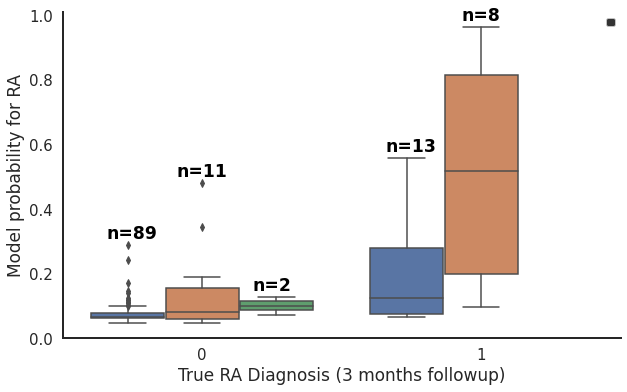

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
TARGET = 'RA'

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=TARGET + '_true', y='pred%s' % TARGET, hue= TARGET + '_GP', data=df_comparison) # For patients that have RA! () 
plt.xlabel('True %s Diagnosis (3 months followup)' % TARGET, fontsize=17)
plt.ylabel('Model probability for %s' % TARGET, fontsize=17)

plt.title("Boxplot showing association between GP mentioning %s and the model's confidence for %s" % (TARGET, TARGET))
# Set the size of the x and y tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Remove the upper & right spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate the number of samples for each combination of Category and Hue
category_hue_counts = df_comparison.groupby([TARGET + '_true', TARGET + '_GP']).size().unstack(fill_value=0)

# Add text annotations
for i, category in enumerate(category_hue_counts.index):
    for j, hue in enumerate(category_hue_counts.columns):
        count = category_hue_counts.loc[category, hue]
        #print(category, hue)
        #print(df_comparison[(df_comparison[TARGET + '_x'] == category) & (df_comparison[ TARGET + '_y'] == hue)]['Identifier'])
        # Calculate the x position (primary category index + hue offset)
        x_pos = i + (j * 0.25) - 0.25  # Adjust the offset to place the annotation in the middle of the box
        y_pos = df_comparison[(df_comparison[TARGET + '_true'] == category) & (df_comparison[ TARGET + '_GP'] == hue)]['pred%s' % TARGET].max() +  0.02 #- 0.03 #+ 1  # Adjust the y position above the boxplot
        ax.text(x_pos, y_pos, f'n={count}', horizontalalignment='center', size='x-large', color='black', weight='semibold')

# Retrieve the handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create a mapping of old labels to new labels
label_mapping = {'0.0': 'no', '1.0': 'yes', '9.0' : 'unclear'}

# Update the labels
new_labels = [label_mapping[label] for label in labels]


# Update the legend with new labels
#plt.legend(handles, new_labels, title='GP mentions %s' % TARGET, fontsize=12)
plt.legend([])
#plt.setp(legend.get_title()) 
        
# Customize plot
ax.set_title('')
plt.show()

# data=df_comparison[df_comparison[TARGET + '_y']==1]

posx and posy should be finite values
posx and posy should be finite values


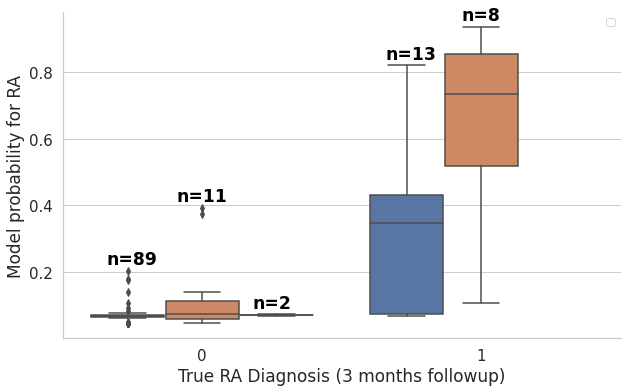

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
TARGET = 'RA'

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=TARGET + '_true', y='pred%s' % TARGET, hue= TARGET + '_GP', data=df_comparison) # For patients that have RA! () 
plt.xlabel('True %s Diagnosis (3 months followup)' % TARGET, fontsize=17)
plt.ylabel('Model probability for %s' % TARGET, fontsize=17)

plt.title("Boxplot showing association between GP mentioning %s and the model's confidence for %s" % (TARGET, TARGET))
# Set the size of the x and y tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Remove the upper & right spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate the number of samples for each combination of Category and Hue
category_hue_counts = df_comparison.groupby([TARGET + '_true', TARGET + '_GP']).size().unstack(fill_value=0)

# Add text annotations
for i, category in enumerate(category_hue_counts.index):
    for j, hue in enumerate(category_hue_counts.columns):
        count = category_hue_counts.loc[category, hue]
        # Calculate the x position (primary category index + hue offset)
        x_pos = i + (j * 0.25) - 0.25  # Adjust the offset to place the annotation in the middle of the box
        y_pos = df_comparison[(df_comparison[TARGET + '_true'] == category) & (df_comparison[ TARGET + '_GP'] == hue)]['pred%s' % TARGET].max() +  0.02 #- 0.03 #+ 1  # Adjust the y position above the boxplot
        ax.text(x_pos, y_pos, f'n={count}', horizontalalignment='center', size='x-large', color='black', weight='semibold')

# Retrieve the handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create a mapping of old labels to new labels
label_mapping = {'0.0': 'no', '1.0': 'yes', '9.0' : 'unclear'}

# Update the labels
new_labels = [label_mapping[label] for label in labels]


# Update the legend with new labels
#plt.legend(handles, new_labels, title='GP mentions %s' % TARGET, fontsize=12)
plt.legend([])
#plt.setp(legend.get_title()) 
        
# Customize plot
ax.set_title('')
plt.show()

# data=df_comparison[df_comparison[TARGET + '_y']==1]

## Compare shap for these patients (blue boxes, where GP doesnt mention it!)

In [14]:
from scipy import stats 

#TARGET = 'OA'
group1= df_comparison[(df_comparison[TARGET + '_true'] == 1) & (df_comparison[ TARGET + '_GP'] == 1)]['pred%s' % TARGET]
group2= df_comparison[(df_comparison[TARGET + '_true'] == 1) & (df_comparison[ TARGET + '_GP'] == 0)]['pred%s' % TARGET]


# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Calculate the effect size (Cohen's d)
mean1 = np.mean(group1)
mean2 = np.mean(group2)
pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + (len(group2) - 1) * np.var(group2, ddof=1)) / (len(group1) + len(group2) - 2))
effect_size = (mean1 - mean2) / pooled_std

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size (Cohen's d):", effect_size)

T-statistic: -0.33049915097482063
P-value: 0.743776694075817
Effect size (Cohen's d): -0.12800176665576876


In [53]:
with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/tfidf/tfidf_vectorizer_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
    tfidf_vectorizer = pickle.load(fin)

with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/xgb/xgb_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
    bst = pickle.load(fin)

X_feat_test = tfidf_vectorizer.transform(df_comparison['fixedLine'])
dtest = xgb.DMatrix(X_feat_test) 
df_comparison['pred%s' % TARGET] = bst.predict(dtest)
    
    

In [54]:
import shap

N_FEAT = 15
t_explainer = shap.TreeExplainer(bst, feature_names=tfidf_vectorizer.get_feature_names()) # or just X? ,  feature_names=tfidf_feature_names

shap_values = t_explainer( X_feat_test[(df_comparison[ TARGET + '_GP'] == 0)], df_comparison[(df_comparison[ TARGET + '_GP'] == 0)]['pred%s' % TARGET])


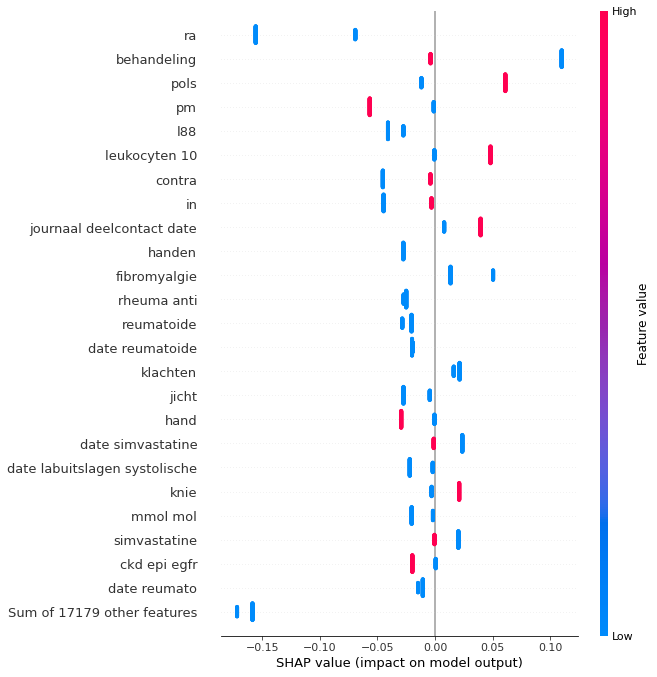

<Figure size 432x288 with 0 Axes>

In [55]:

plt.figure(figsize=(2, 3)) # , dpi=80
shap.plots.beeswarm(shap_values, max_display=25)

fig, ax = plt.gcf(), plt.gca()
#ax.set_yticklabels(feature_names, fontsize=23) 

plt.subplots_adjust(bottom=0.4)
plt.tight_layout()
plt.savefig('../figures/prediction/shap_RA_top%s_GPnoIdea.png' % (str(N_FEAT)))
plt.clf()

### Compare two blue boxplots

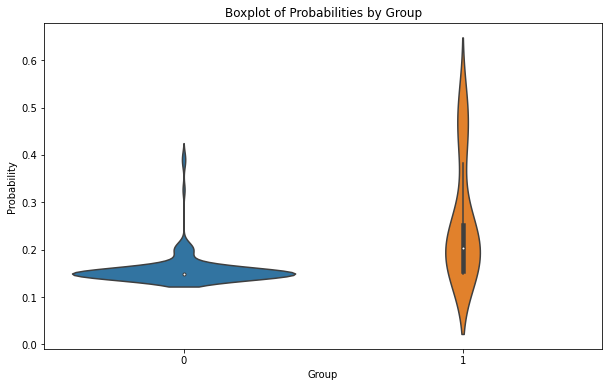

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='FMS_x', y='predFMS', data=df_comparison)
plt.xlabel('Group')
plt.ylabel('Probability')
plt.title('Boxplot of Probabilities by Group')
plt.show()

## Evaluate Prioritisation

In [18]:
df_replication['Locatie'].unique()

array(['Hulst', 'Zierikzee', 'Vlissingen', 'Terneuzen', 'Zeist',
       'Emmeloord', 'Lemmer', 'Lelystad', 'Oostburg'], dtype=object)

In [19]:
import pandas as pd
df_replication = pd.read_csv('../proc/extra/df_replication.csv')

print(len(df_replication), len(df_replication['Identifier'].unique()), len(df_replication['Locatie'].unique()) )

831 615 9


In [20]:
import pandas as pd

# Save data splits
df_train = pd.read_csv('../proc/extra/df_train.csv')
df_test = pd.read_csv('../proc/extra/df_test.csv')
df_replication = pd.read_csv('../proc/extra/df_replication.csv')

df_eval = df_test.copy()

print('Prevalence in training data')
for diag in ['Chronic', 'RA', 'FMS', 'OA']:
    print(diag, '\t' * (diag != 'Chronic'), 'pat: ', len(df_train[df_train[diag]==1]['Identifier'].unique()), ' ; N: ', len(df_train[df_train[diag]==1]))

Prevalence in training data
Chronic  pat:  2044  ; N:  2741
RA 	 pat:  352  ; N:  418
FMS 	 pat:  215  ; N:  289
OA 	 pat:  861  ; N:  1122


In [21]:
import pickle
import xgboost as xgb
TARGET = 'FMS'

for TARGET in ['Chronic', 'FMS', 'RA', 'OA']:
    with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/tfidf/tfidf_vectorizer_%s_ngram_1000iter_new.pk' % TARGET, 'rb') as fin:
        tfidf_vectorizer = pickle.load(fin)

    with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/xgb/xgb_%s_ngram_1000iter_new.pk' % TARGET, 'rb') as fin:
        bst = pickle.load(fin)

    X_feat_test = tfidf_vectorizer.transform(df_eval['fixedLine']) # df_replication['fixedLine'] df_test['proc_RTFscripted'])
    dtest = xgb.DMatrix(X_feat_test) 
    df_eval['pred%s' % TARGET] = bst.predict(dtest)

In [22]:
# Use idxmax to find the column with the maximum value for each row
df_eval['Category'] = df_eval[['FMS', 'RA', 'OA', 'Chronic']].idxmax(axis=1)

# Handle cases where all dummy variables are 0 by setting the category to 'None'
df_eval['Category'] = df_eval.apply(lambda row: 'None' if row[['FMS', 'RA', 'OA', 'Chronic']].sum() == 0 else row['Category'], axis=1)


# Map the column names to meaningful category names (optional)
category_mapping = {
    #'predChronic': 'Chronic',
    'FMS': 'FMS',
    'RA': 'RA',
    'OA': 'OA',
    'Chronic': 'Chronic',
    'None' : 'No diagnosis'
}
df_eval['Category'] = df_eval['Category'].map(category_mapping)


### Examine current situation (we use current wait time for reference)

In [23]:
# Add referral date
df_eval['deltaref'] = df_eval['delta_referral_visit'].copy()


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

TOP_N = 1000
TARGET = 'RA'
# [df_eval['deltaref'] >= 1]
df_sort = df_eval.reset_index(drop=True).copy()
df_sort = df_sort.reset_index()
df_sort = df_sort.rename(columns = { 'index': 'old_index'} )

df_sort1 = df_sort.sort_values(by='deltaref', ascending=True).copy()#['RA'].values[:10]
df_sort2 = df_sort.sort_values(by='pred%s' % TARGET, ascending=False).copy()#['RA'].values[:10]

L_s1_iloc = [i for i in range(1, len(df_sort) + 1, 1)] #[i for i in range(1, TOP_N + 1, 1)]
L_s2_iloc = [i for i in range(1, len(df_sort) + 1, 1)]  #[i for i in range(1, TOP_N + 1, 1)]

new_s1_sort = dict(zip(df_sort1['old_index'], df_sort1.reset_index(drop=True).index))
new_s2_sort = dict(zip(df_sort2['old_index'], df_sort2.reset_index(drop=True).index))

df_sort['sort1'] = df_sort['old_index'].apply(lambda x : new_s1_sort[x])
df_sort['sort2'] = df_sort['old_index'].apply(lambda x : new_s2_sort[x])


L_s1_val = df_sort1[TARGET].index.values#[:TOP_N]
L_s2_val = df_sort2[TARGET].index.values#[:TOP_N]

L_s1_cat = df_sort1['Category'].values#[:TOP_N]#.astype(str)
L_s2_cat = df_sort2['Category'].values#[:TOP_N]#.astype(str)

L_cat_both = list(L_s1_cat)
L_cat_both.extend(L_s2_cat)

L_val_both = list(df_sort1['old_index'])
L_val_both.extend(list(df_sort2['old_index']))

L_iloc_both = list(L_s1_iloc)
L_iloc_both.extend(L_s2_iloc)


# Sample data
data = {
    'Item': L_val_both,
    'TimePoint': [1]*len(L_s1_cat) + [2]*len(L_s1_cat),
    'Value': L_iloc_both,
    'Category': L_cat_both,
}

df = pd.DataFrame(data)
df = df.set_index(['Item'])


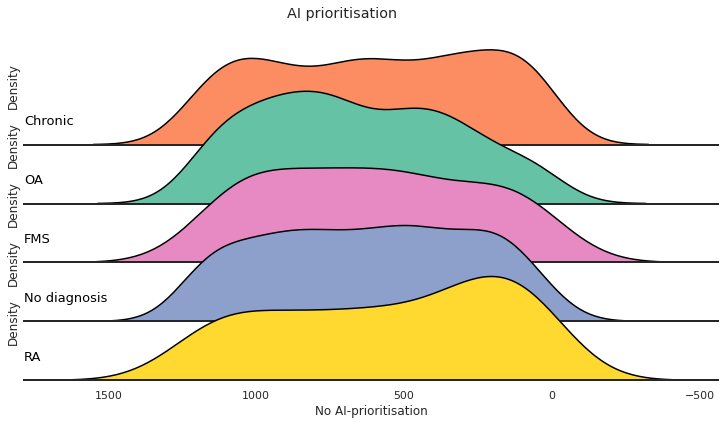

In [29]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

# Define a custom palette using colors from the Set2 palette
custom_palette = {
    'OA': palette[0],  # First color in Set2
    'Chronic': palette[1],   # Second color in Set2
    'FMS': palette[3],   # Third color in Set2
    'No diagnosis': palette[2],    # Fourth color in Set2
    'RA' : palette[5]
}

# Define colors for categories
category_colors = {
    #'0': 'blue',
    #'1': 'green',
    'RA': 'blue',
    'Chronic': 'green',
    'OA': 'cyan',
    'FMS': 'yellow',
    'No diagnosis' : 'grey'
}

g = sns.FacetGrid(df_sort, palette=custom_palette, row="Category", hue="Category", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="sort1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="sort1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Category")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="No AI-prioritisation")
g.despine( left=True)
plt.suptitle('AI prioritisation', y=0.98)
g.fig.gca().invert_xaxis()#(1000, 0)

In [200]:
items_t2 = time2[time2['Category'] == 'OA'].sort_values(by='Value', ascending=False)
items_t1 = time1[time1['Category'] == 'OA'].sort_values(by='Value', ascending=False)



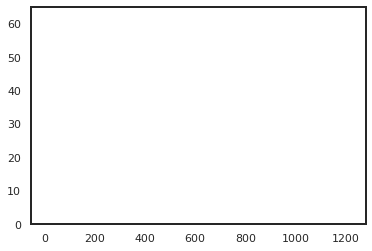

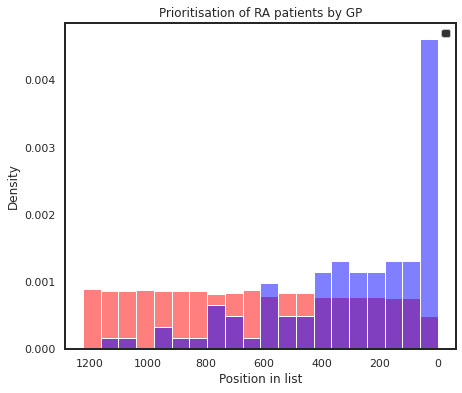

In [28]:
TARGET = 'RA'
df_ix_new = df_sort2.reset_index(drop=True)

# Determine the bin edges that will be used for both distributions
bin_edges = plt.hist([df_ix_new[df_ix_new['%s' % TARGET]==0].index, df_ix_new[df_ix_new['%s' % TARGET]==1].index], bins=20, alpha=0.0)[1]

fig, ax = plt.subplots(figsize=(7, 6))

# Plot the first distribution
sns.histplot(df_ix_new[df_ix_new['%s' % TARGET]==0].index, label='non%s' % TARGET, fill=True, color='red', bins=bin_edges, alpha=0.5, stat='density')

# Plot the second distribution
sns.histplot(df_ix_new[df_ix_new['%s' % TARGET]==1].index, label='%s' % TARGET, fill=True, color='blue', bins=bin_edges, alpha=0.5, stat='density')



# Add title and labels
plt.title('Prioritisation of %s patients by GP' % TARGET)
plt.xlabel('Position in list')
plt.ylabel('Density')
plt.legend([])
# Ensure the ylim reflect the max height
#plt.ylim(0, 0.06)

plt.gca().invert_xaxis()

# Show the plot
plt.show()

In [27]:
from scipy.stats import ks_2samp, ttest_ind, normaltest
k2, p = normaltest(df_ix_new[df_ix_new['%s' % TARGET]==1].index)
print('Normality:', k2, p)

#perform T-test
t_stat, p = ttest_ind(df_ix_new[df_ix_new['%s' % TARGET]==0].index, df_ix_new[df_ix_new['%s' % TARGET]==1].index)
print(f't={t_stat}, p={p}')

Normality: 50.00541478898551 1.38503945755343e-11
t=1.8749521452613471, p=0.06103745753003321


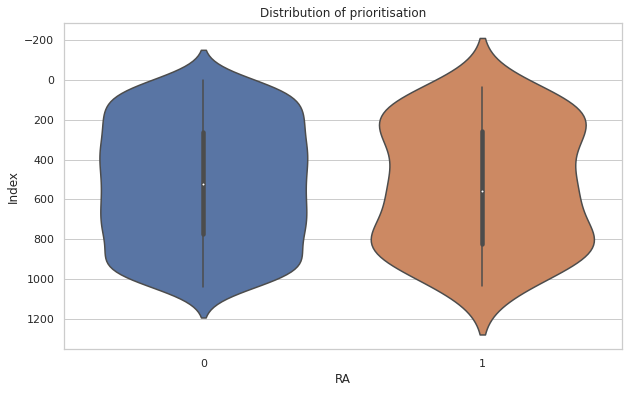

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='RA', y=df_sort1.index, data=df_sort1)
plt.gca().invert_yaxis()

plt.xlabel('RA')
plt.ylabel('Index')
plt.title('Distribution of prioritisation')
plt.show()

In [89]:

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 6))



# Plot dots for time point 1
time1 = df[df['TimePoint'] == 1]
sns.scatterplot(data=time1[:TOP_N], x='TimePoint', y='Value', hue='Category', palette=category_colors, s=100, ax=ax)
ax.legend(title='Category')

# Plot dots for time point 2
time2 = df[df['TimePoint'] == 2]
sns.scatterplot(data=time2[:TOP_N], x='TimePoint', y='Value', hue='Category', palette=category_colors, s=100, ax=ax, legend=False)


# Draw links between matching categories
for cat in df['Category'].unique():
    items_t1 = time1[time1['Category'] == cat].sort_index(ascending=False)
    items_t2 = time2[time2['Category'] == cat].sort_index(ascending=False)#.sort_values(by='Value', ascending=False)
    
    s1_top = set(items_t1[items_t1['Value']<TOP_N].index) 
    s2_top = set(items_t2[items_t2['Value']<TOP_N].index)
    s_total = s1_top.union(s2_top)
    items_t1 = items_t1[items_t1.index.isin(s_total)]
    items_t2 = items_t2[items_t2.index.isin(s_total)]
    
    # Define the upper limit
    upper_limit = TOP_N+100

    # Replace values greater than upper_limit with upper_limit
    items_t1['Value'] = items_t1['Value'].apply(lambda x: upper_limit if x > upper_limit else x)# .clip(upper=upper_limit)
    items_t2['Value'] = items_t2['Value'].apply(lambda x: upper_limit if x > upper_limit else x)
        
    for i in range(len(s_total)):
        ax.plot([1, 2], [items_t1.iloc[i]['Value'], items_t2.iloc[i]['Value']], color=category_colors[cat], linestyle='-', alpha=0.4)
        
ax.set_ylim(0, TOP_N)    
ax.invert_yaxis()

    
# Customize plot
ax.set_xticks([1, 2])
ax.set_xticklabels(['Current situation \n (Observed wait time)', 'ML-based prioritisation\n (%s-classifier probabilities)' % TARGET])
ax.set_title('Current situation vs ML-based prioritisation (Top %s)' % TOP_N)
ax.set_xlabel('')


plt.show()

<80x17203 sparse matrix of type '<class 'numpy.float64'>'
	with 31865 stored elements in Compressed Sparse Row format>

In [110]:
import shap

N_FEAT = 15
TARGET = 'RA'
with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/tfidf/tfidf_vectorizer_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
    tfidf_vectorizer = pickle.load(fin)

with open('/exports/reum/tdmaarseveen/gitlab/referral_ml/model/xgb/xgb_%s_ngram_100iter.pk' % TARGET, 'rb') as fin:
    bst = pickle.load(fin)
df_sub = df_eval[(((df_eval[TARGET]==0) & (df_eval['pred%s' % TARGET]>0.25)))].copy()
X_feat_test = tfidf_vectorizer.transform(df_sub['proc_RTFscripted'].values) # df_replication['fixedLine'] df_test['proc_RTFscripted'])
dtest = xgb.DMatrix(X_feat_test) 
#df_sub['pred%s' % TARGET] = bst.predict(dtest)

t_explainer = shap.TreeExplainer(bst, feature_names=tfidf_vectorizer.get_feature_names()) # or just X? ,  feature_names=tfidf_feature_names

shap_values = t_explainer( X_feat_test, df_sub['pred%s' % TARGET])


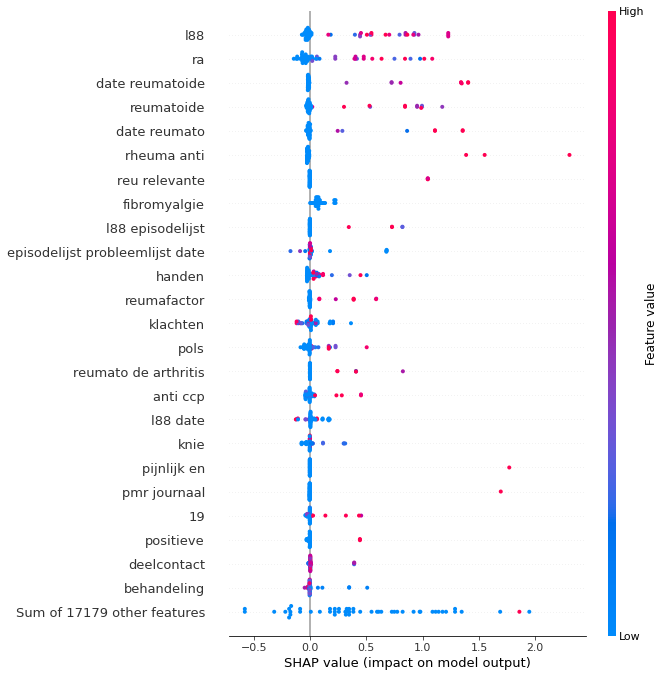

<Figure size 432x288 with 0 Axes>

In [111]:



plt.figure(figsize=(2, 3)) # , dpi=80
shap.plots.beeswarm(shap_values, max_display=25)

fig, ax = plt.gcf(), plt.gca()
#ax.set_yticklabels(feature_names, fontsize=23) 

plt.subplots_adjust(bottom=0.4)
plt.tight_layout()
plt.savefig('../figures/prediction/shap_RA_top%s_highScores_RA.png' % (str(N_FEAT)))
plt.clf()

### Show prevalences of conditions in pie chart!

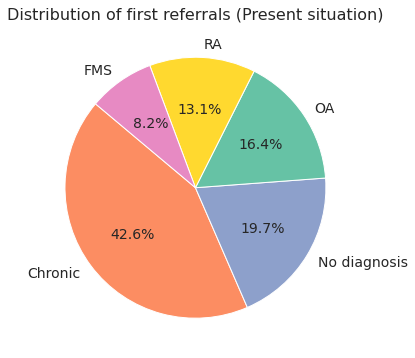

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Pandas Series of categories
categories = pd.Series(L_s1_cat[:61])

# Count the frequencies of each category
category_counts = categories.value_counts()

category_colors = {
    'RA': 'blue',
    'Chronic': 'green',
    'OA': 'cyan',
    'FMS': 'yellow',
    'No diagnosis' : 'grey'
}

# Define a custom function for autopct to change the font color of the last category
def custom_autopct(pct, allvalues):
    return f'{pct:.1f}%\n{absolute:d}', dict(color='black')

colors = [custom_palette[i] for i in category_counts.index]

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    category_counts, 
    labels=category_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=140, 
    textprops={'fontsize': 14}
)
plt.title('Distribution of first referrals (Present situation)', fontsize=16)

# Adjust the font properties for the specific category
#for i, text in enumerate(texts):
#    if text.get_text() == 'RA':
#        autotexts[i].set_color('white')

plt.show()

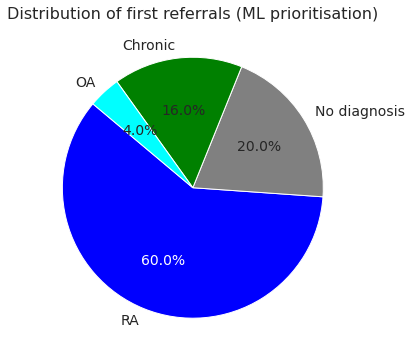

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Pandas Series of categories
categories = pd.Series(L_s2_cat[:TOP_N])

# Count the frequencies of each category
category_counts = categories.value_counts()

category_colors = {
    'RA': 'blue',
    'Chronic': 'green',
    'OA': 'cyan',
    'FMS': 'yellow',
    'No diagnosis' : 'grey'
}

# Define a custom function for autopct to change the font color of the last category
def custom_autopct(pct, allvalues):
    return f'{pct:.1f}%\n{absolute:d}', dict(color='black')

colors = [category_colors[i] for i in category_counts.index]

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    category_counts, 
    labels=category_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=140, 
    textprops={'fontsize': 14}
)
plt.title('Distribution of first referrals (ML prioritisation)', fontsize=16)

# Adjust the font properties for the specific category
for i, text in enumerate(texts):
    if text.get_text() == 'RA':
        autotexts[i].set_color('white')

plt.show()